<a href="https://colab.research.google.com/github/RSathvikareddy/Real-Time-Ultrasound-Nerve-Segmentation-Using-U-Net-Model/blob/main/Uns_Source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

Mounted at /content/drive
Loading data...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,137 (902.88 KB)

 Trainable params: 231,137 (902.88 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.9686 - loss: 0.1902 - val_accuracy: 0.9878 - val_loss: 0.0557
Epoch 2/30
  1/140 ━━━━━━━━━━━━━━━━━━━━ 11:58 5s/step - accuracy: 0.9888 - loss: 0.0531

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9888 - loss: 0.0531 - val_accuracy: 0.9878 - val_loss: 0.0535
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.9876 - loss: 0.0552 - val_accuracy: 0.9878 - val_loss: 0.0477
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0373 - val_accuracy: 0.9878 - val_loss: 0.0486
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9880 - loss: 0.0486 - val_accuracy: 0.9878 - val_loss: 0.0464
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9871 - loss: 0.0459 - val_accuracy: 0.9878 - val_loss: 0.0470
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9879 - loss: 0.0474 - val_accuracy: 0.9878 - val_loss: 0.0457
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9843 - loss: 0.0665 - val_accuracy: 0.9878 - val_loss: 0.0465
Epoch 9/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9881 - loss: 0.0449 - val_accuracy: 0.987

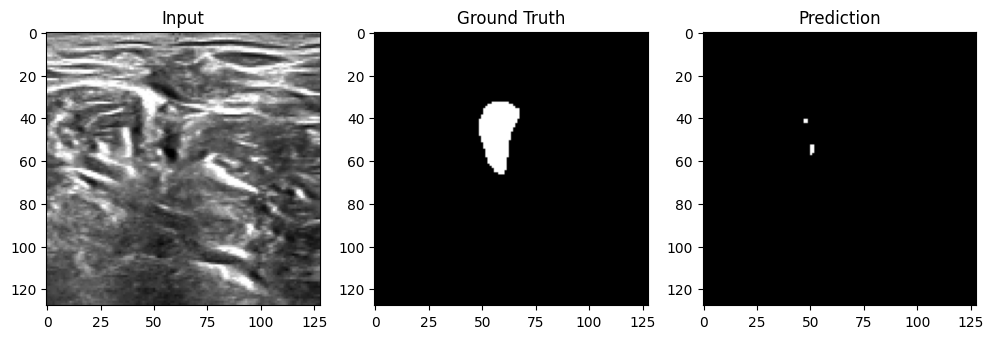

In [ ]:
# Install required packages
!pip install opencv-python-headless

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Configuration
config = {
    'img_size': (128, 128),
    'batch_size': 32,
    'epochs': 30,
    'base_path': '/content/drive/MyDrive/ultrasound-nerve-segmentation'
}

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Prepare file paths
def prepare_paths():
    train_path = os.path.join(config['base_path'], 'train')
    image_files = [f for f in os.listdir(train_path) if 'mask' not in f]
    image_paths = []
    mask_paths = []

    for img_file in image_files:
        img_id = img_file.split('.')[0]
        mask_file = f"{img_id}_mask.tif"
        img_path = os.path.join(train_path, img_file)
        mask_path = os.path.join(train_path, mask_file)

        if os.path.exists(mask_path):
            image_paths.append(img_path)
            mask_paths.append(mask_path)

    return image_paths, mask_paths

# Load and process images using OpenCV (faster than tf.io for TIFF)
def load_image_opencv(img_path, mask_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, config['img_size'])
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, config['img_size'])
    mask = (mask > 127).astype(np.float32)
    mask = np.expand_dims(mask, axis=-1)

    # Simple augmentation
    if np.random.rand() > 0.5:
        img = np.fliplr(img)
        mask = np.fliplr(mask)

    return img, mask

# Create numpy arrays from all data (most reliable approach)
def create_arrays(image_paths, mask_paths):
    images = np.zeros((len(image_paths), *config['img_size'], 1), dtype=np.float32)
    masks = np.zeros((len(mask_paths), *config['img_size'], 1), dtype=np.float32)

    for i, (img_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
        images[i], masks[i] = load_image_opencv(img_path, mask_path)

    return images, masks

# Prepare data
print("Loading data...")
image_paths, mask_paths = prepare_paths()
train_img, val_img, train_mask, val_mask = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=42)

# Create numpy arrays
X_train, Y_train = create_arrays(train_img, train_mask)
X_val, Y_val = create_arrays(val_img, val_mask)

# Create simple tf.data.Dataset from numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = val_dataset.batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)

# Calculate steps
steps_per_epoch = len(X_train) // config['batch_size']
validation_steps = len(X_val) // config['batch_size']

# Simplified U-Net
def build_fast_unet():
    inputs = layers.Input((*config['img_size'], 1))

    # Downsample
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(2)(x)

    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)

    # Bottleneck
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)

    # Upsample
    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)

    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same')(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train
model = build_fast_unet()
model.summary()

print("Training model...")
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    epochs=config['epochs']
)

# Visualization function
def visualize_prediction(model, images, masks, index=0):
    img = images[index]
    mask = masks[index]
    pred = model.predict(np.expand_dims(img, axis=0))[0]

    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title('Input')
    plt.subplot(132)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title('Ground Truth')
    plt.subplot(133)
    plt.imshow(pred.squeeze() > 0.5, cmap='gray')
    plt.title('Prediction')
    plt.show()

# Visualize a sample
print("Sample prediction:")
visualize_prediction(model, X_val, Y_val)


Validation Set Metrics:
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step
Test Accuracy: 0.9898
Dice Coefficient: 0.4194
IoU (Jaccard Index): 0.2653


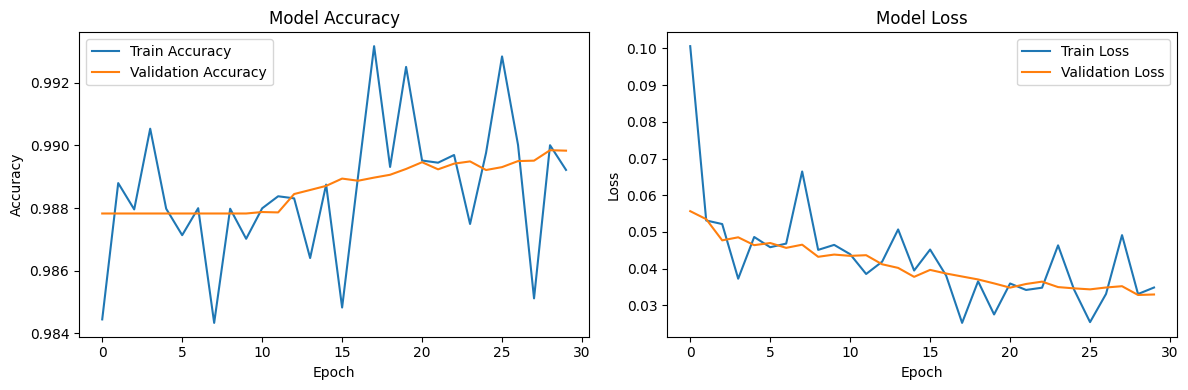


Sample Predictions with Metrics:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


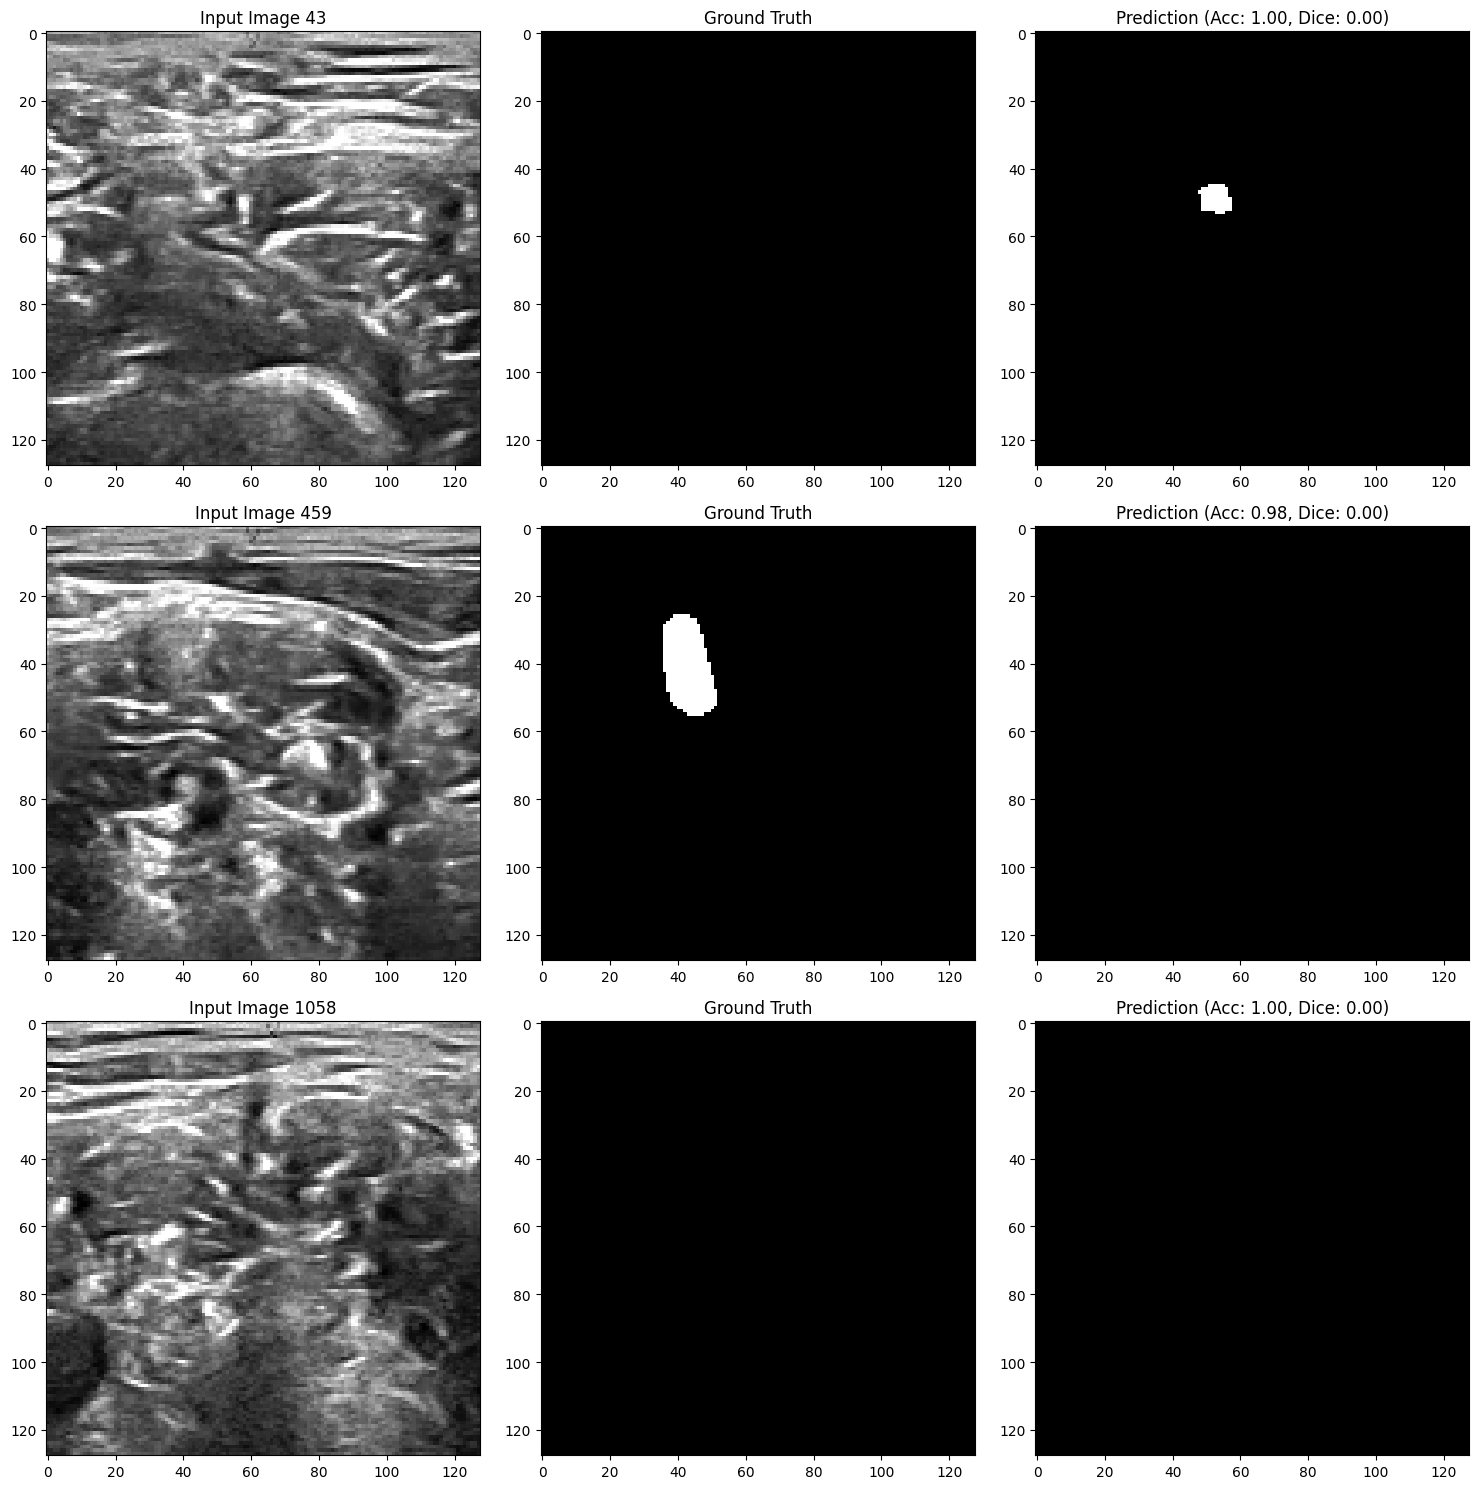

In [ ]:
# Calculate and display accuracy and other metrics
def evaluate_model(model, X_test, Y_test):
    # Predict on test data
    Y_pred = model.predict(X_test)
    Y_pred_thresholded = (Y_pred > 0.5).astype(np.float32)

    # Calculate metrics
    accuracy = np.mean(Y_pred_thresholded == Y_test)
    dice_coef = (2 * np.sum(Y_pred_thresholded * Y_test)) / (np.sum(Y_pred_thresholded) + np.sum(Y_test) + 1e-7)
    iou = np.sum(Y_pred_thresholded * Y_test) / (np.sum((Y_pred_thresholded + Y_test) > 0) + 1e-7)

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Dice Coefficient: {dice_coef:.4f}")
    print(f"IoU (Jaccard Index): {iou:.4f}")

    return accuracy, dice_coef, iou

# Evaluate on validation set
print("\nValidation Set Metrics:")
val_accuracy, val_dice, val_iou = evaluate_model(model, X_val, Y_val)

# If you have a separate test set, load and evaluate it similarly
# test_img_paths, test_mask_paths = prepare_test_paths()
# X_test, Y_test = create_arrays(test_img_paths, test_mask_paths)
# print("\nTest Set Metrics:")
# test_accuracy, test_dice, test_iou = evaluate_model(model, X_test, Y_test)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training curves
plot_training_history(history)

# Visualize multiple predictions
def visualize_multiple_predictions(model, images, masks, num_samples=3):
    indices = np.random.choice(len(images), size=num_samples, replace=False)

    plt.figure(figsize=(15, 5*num_samples))
    for i, idx in enumerate(indices):
        img = images[idx]
        mask = masks[idx]
        pred = model.predict(np.expand_dims(img, axis=0))[0]
        pred_thresh = (pred > 0.5).astype(np.float32)

        # Calculate metrics for this sample
        sample_acc = np.mean(pred_thresh == mask)
        sample_dice = (2 * np.sum(pred_thresh * mask)) / (np.sum(pred_thresh) + np.sum(mask) + 1e-7)

        plt.subplot(num_samples, 3, i*3+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f'Input Image {idx}')

        plt.subplot(num_samples, 3, i*3+2)
        plt.imshow(mask.squeeze(), cmap='gray')
        plt.title('Ground Truth')

        plt.subplot(num_samples, 3, i*3+3)
        plt.imshow(pred_thresh.squeeze(), cmap='gray')
        plt.title(f'Prediction (Acc: {sample_acc:.2f}, Dice: {sample_dice:.2f})')

    plt.tight_layout()
    plt.show()

# Visualize multiple predictions
print("\nSample Predictions with Metrics:")
visualize_multiple_predictions(model, X_val, Y_val, num_samples=3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data...


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,137 (902.88 KB)

 Trainable params: 231,137 (902.88 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 126ms/step - accuracy: 0.9509 - loss: 0.2610 - val_accuracy: 0.9878 - val_loss: 0.0665
Epoch 2/50
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1:45 2s/step - accuracy: 0.9848 - loss: 0.0783

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9848 - loss: 0.0783 - val_accuracy: 0.9878 - val_loss: 0.0664
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.9882 - loss: 0.0614 - val_accuracy: 0.9878 - val_loss: 0.0565
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9835 - loss: 0.0750 - val_accuracy: 0.9878 - val_loss: 0.0614
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9881 - loss: 0.0563 - val_accuracy: 0.9878 - val_loss: 0.0513
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9865 - loss: 0.0562 - val_accuracy: 0.9878 - val_loss: 0.0522
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.9881 - loss: 0.0515 - val_accuracy: 0.9878 - val_loss: 0.0514
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9928 - loss: 0.0314 - val_accuracy: 0.9878 - val_loss: 0.0503
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.9881 - loss: 0.0493 - val_accuracy: 0.9878 - val_loss:

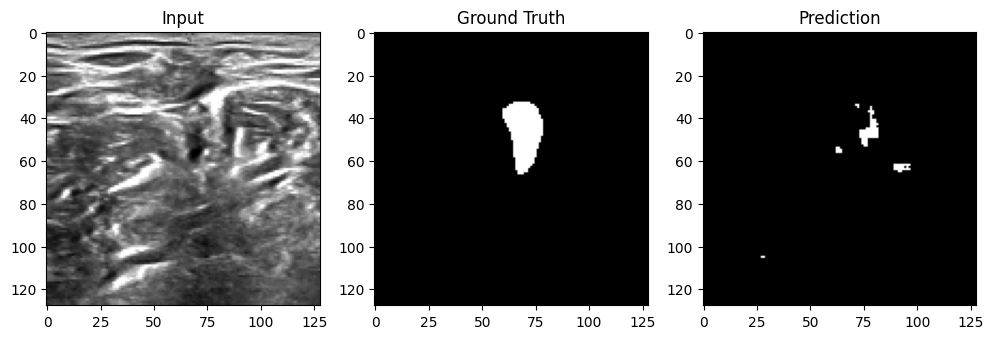

In [ ]:
# Install required packages
!pip install opencv-python-headless

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Configuration
config = {
    'img_size': (128, 128),
    'batch_size': 64,
    'epochs': 50,
    'base_path': '/content/drive/MyDrive/ultrasound-nerve-segmentation'
}

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Prepare file paths
def prepare_paths():
    train_path = os.path.join(config['base_path'], 'train')
    image_files = [f for f in os.listdir(train_path) if 'mask' not in f]
    image_paths = []
    mask_paths = []

    for img_file in image_files:
        img_id = img_file.split('.')[0]
        mask_file = f"{img_id}_mask.tif"
        img_path = os.path.join(train_path, img_file)
        mask_path = os.path.join(train_path, mask_file)

        if os.path.exists(mask_path):
            image_paths.append(img_path)
            mask_paths.append(mask_path)

    return image_paths, mask_paths

# Load and process images using OpenCV (faster than tf.io for TIFF)
def load_image_opencv(img_path, mask_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, config['img_size'])
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, config['img_size'])
    mask = (mask > 127).astype(np.float32)
    mask = np.expand_dims(mask, axis=-1)

    # Simple augmentation
    if np.random.rand() > 0.5:
        img = np.fliplr(img)
        mask = np.fliplr(mask)

    return img, mask

# Create numpy arrays from all data (most reliable approach)
def create_arrays(image_paths, mask_paths):
    images = np.zeros((len(image_paths), *config['img_size'], 1), dtype=np.float32)
    masks = np.zeros((len(mask_paths), *config['img_size'], 1), dtype=np.float32)

    for i, (img_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
        images[i], masks[i] = load_image_opencv(img_path, mask_path)

    return images, masks

# Prepare data
print("Loading data...")
image_paths, mask_paths = prepare_paths()
train_img, val_img, train_mask, val_mask = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=42)

# Create numpy arrays
X_train, Y_train = create_arrays(train_img, train_mask)
X_val, Y_val = create_arrays(val_img, val_mask)

# Create simple tf.data.Dataset from numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = val_dataset.batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)

# Calculate steps
steps_per_epoch = len(X_train) // config['batch_size']
validation_steps = len(X_val) // config['batch_size']

# Simplified U-Net
def build_fast_unet():
    inputs = layers.Input((*config['img_size'], 1))

    # Downsample
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(2)(x)

    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)

    # Bottleneck
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)

    # Upsample
    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)

    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same')(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train
model = build_fast_unet()
model.summary()

print("Training model...")
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    epochs=config['epochs']
)

# Visualization function
def visualize_prediction(model, images, masks, index=0):
    img = images[index]
    mask = masks[index]
    pred = model.predict(np.expand_dims(img, axis=0))[0]

    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title('Input')
    plt.subplot(132)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title('Ground Truth')
    plt.subplot(133)
    plt.imshow(pred.squeeze() > 0.5, cmap='gray')
    plt.title('Prediction')
    plt.show()

# Visualize a sample
print("Sample prediction:")
visualize_prediction(model, X_val, Y_val)

In [ ]:
# Install required packages
!pip install opencv-python-headless

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Configuration
config = {
    'img_size': (128, 128),
    'batch_size': 32,
    'epochs': 30,
    'base_path': '/content/drive/MyDrive/ultrasound-nerve-segmentation'
}

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Prepare data paths
def prepare_paths():
    train_path = os.path.join(config['base_path'], 'train')
    image_files = [f for f in os.listdir(train_path) if 'mask' not in f]
    image_paths = []
    mask_paths = []

    for img_file in image_files:
        img_id = img_file.split('.')[0]
        mask_file = f"{img_id}_mask.tif"
        img_path = os.path.join(train_path, img_file)
        mask_path = os.path.join(train_path, mask_file)

        if os.path.exists(mask_path):
            image_paths.append(img_path)
            mask_paths.append(mask_path)

    return image_paths, mask_paths

# Load and preprocess images
def load_image_opencv(img_path, mask_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, config['img_size'])
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, config['img_size'])
    mask = (mask > 127).astype(np.float32)
    mask = np.expand_dims(mask, axis=-1)

    if np.random.rand() > 0.5:  # Simple augmentation
        img = np.fliplr(img)
        mask = np.fliplr(mask)

    return img, mask

# Create numpy arrays
def create_arrays(image_paths, mask_paths):
    images = np.zeros((len(image_paths), *config['img_size'], 1), dtype=np.float32)
    masks = np.zeros((len(mask_paths), *config['img_size'], 1), dtype=np.float32)

    for i, (img_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
        images[i], masks[i] = load_image_opencv(img_path, mask_path)

    return images, masks

# Load and split data
print("Loading data...")
image_paths, mask_paths = prepare_paths()
train_img, val_img, train_mask, val_mask = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=42)

X_train, Y_train = create_arrays(train_img, train_mask)
X_val, Y_val = create_arrays(val_img, val_mask)

# Build and train the model
def build_fast_unet():
    inputs = layers.Input((*config['img_size'], 1))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same')(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_fast_unet()
model.summary()

print("Training model...")
history = model.fit(
    tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(config['batch_size']),
    validation_data=tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(config['batch_size']),
    epochs=config['epochs']
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,137 (902.88 KB)

 Trainable params: 231,137 (902.88 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 542s 4s/step - accuracy: 0.9713 - loss: 0.1949 - val_accuracy: 0.9878 - val_loss: 0.0561
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 558s 4s/step - accuracy: 0.9881 - loss: 0.0548 - val_accuracy: 0.9878 - val_loss: 0.0483
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 562s 4s/step - accuracy: 0.9881 - loss: 0.0494 - val_accuracy: 0.9878 - val_loss: 0.0467
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 552s 4s/step - accuracy: 0.9881 - loss: 0.0470 - val_accuracy: 0.9878 - val_loss: 0.0458
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 549s 4s/step - accuracy: 0.9881 - loss: 0.0459 - val_accuracy: 0.9878 - val_loss: 0.0446
Epoch 6/30
 14/141 ━━━━━━━━━━━━━━━━━━━━ 7:42 4s/step - accuracy: 0.9882 - loss: 0.0429

In [ ]:
from google.colab import files

def predict_new_image(model):
    # Upload image
    uploaded = files.upload()
    file_name = next(iter(uploaded))

    # Preprocess
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, config['img_size'])
    img_normalized = img.astype(np.float32) / 255.0
    img_input = np.expand_dims(img_normalized, axis=-1)
    img_input = np.expand_dims(img_input, axis=0)  # Add batch dim

    # Predict
    pred_mask = model.predict(img_input)[0]
    binary_mask = (pred_mask > 0.5).astype(np.uint8)  # Threshold

    # Plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Input Image')
    plt.subplot(1, 2, 2)
    plt.imshow(binary_mask.squeeze(), cmap='gray')
    plt.title('Predicted Mask')
    plt.show()

# Call the function
print("Upload an image for prediction:")
predict_new_image(model)  # Now 'model' is defined!

# New Section